<a href="https://colab.research.google.com/github/ish66726-a11y/colab-notebooks/blob/main/notebooks/11Vasicek%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#11 Vasicek（ワセチェック）モデル

#10-5 Vasicek（ワセチェック）モデルを使った債券価格の算出  


###1. ゼロクーポン債の基本

額面を $X$、満期を $T$ とすると、**金利が一定** の場合の現在価値は

$$
P(0,T) = X e^{-rT}
$$

例：  
- 額面 X = 1000
- 金利 r = 0.10
- 満期 T = 2  

なら

$$
P(0,2)=1000 e^{-0.1\times 2}
$$

---
##2. Vasicek モデル（金利の確率微分方程式）
金利 $r_t$ は実際には **常に変動する**。

そこで金利に対して **Vasicek モデル**を使う。
$$
dr_t = \kappa(\theta - r_t)\,dt + \sigma\, dW_t
$$

ここで：

| 変数 | 意味 |
|------|------|
| $\kappa$ | 平均回帰速度（Mean reversion speed） |
| $\theta$ | 長期平均金利 |
| $\sigma$ | ボラティリティ |
| $W_t$ | Wiener 過程（標準ブラウン運動） |

**重要点：**

- 金利は **平均 $\theta$ に戻ろうとする**
- その強さが $\kappa$
- ノイズ（不確実性）の大きさが $\sigma$

---

##3. 金利が確率的に変動する場合の債券価格

本来の現在価値は

$$
P(0,T) = \mathbb{E}\left[ e^{-\int_0^T r_t\, dt} \right]
$$

ただし積分は金利パス $r_t$ に依存する。  
解析解は存在するが、一般的な拡張モデルでは解析的に解けないため、Monte Carlo 法を用いる。

---

##4. Monte Carlo 法による債券価格の考え方

1. **Vasicek SDE を用いて金利パスを多数生成する**
   - $r_t^{(1)}, r_t^{(2)}, \dots , r_t^{(N)}$

2. 各パスで割引因子を計算する：

$$
D^{(i)} = e^{- \int_0^T r_t^{(i)} dt }
$$

3. その平均を取る：

$$
P(0,T) = X \cdot \frac{1}{N} \sum_{i=1}^N D^{(i)}
$$

---

##5. なぜ Monte Carlo を使うのか？

- 金利がランダムなので解析的に解くのが困難
- Vasicek は SDE（確率微分方程式）なので数値解が必要
- Monte Carlo は複雑なモデルでも扱える
- シミュレーション回数を増やすと精度が上がる




# 10-6 Vasicek モデルによる債券価格の Monte Carlo 評価

## 1. 概要と目的

本章では、**Vasicek モデル**を用いて短金利を記述し、将来の金利パスを多数生成することで、**ゼロクーポン債の価格を Monte Carlo 法により評価**する。

具体的には以下を行う：

- Vasicek モデルで短金利プロセスを表現  
- 将来の金利パスを多数生成  
- 割引因子の期待値からゼロクーポン債価格を算出  

---
## 2. 理論式（短金利モデルによる債券価格）

短金利モデルにおけるゼロクーポン債価格は、次で定義される：

$$
P(0,T)
=
X \cdot \mathbb{E}\left[
\exp\left(
-\int_0^T r_t \, dt
\right)
\right]
$$

ここで：

- $X$：額面  
- $r_t$：短金利（Vasicek モデル）  
- $T$：満期  

この式は、「将来にわたる短金利の累積（割引率の面積）」を用いて、現在価値を評価していることを意味する。

金利の積分は、シミュレーションでは連続時間のまま扱えないため、時間刻み $\Delta t$ を用いた数値積分（リーマン和）で近似する：

$$
\int_0^T r_t \, dt
\;\approx\;
\sum_{i=0}^{N-1} r_i \, \Delta t
$$

ここで $r_i$ は時刻 $t_i = i\Delta t$ における短金利であり、区間 $[0, T]$ を $N$ 個に分割したときの近似である。




---

## 3. Monte Carlo アルゴリズム

債券価格を Monte Carlo 法で評価する手順は以下の通りである：

1. Vasicek モデルを用いて金利パスを多数生成  
2. 各金利パスについて  
   $$
   I = \sum r_i \, \Delta t
   $$
   を計算  
3. 割引因子  
   $$
   e^{-I}
   $$
   を算出  
4. 全シミュレーションの平均を取り、債券価格を得る：

$$
P(0,T) = X \cdot \text{mean}\left(e^{-I}\right)
$$

---

## 4. Python実装例：Vasicek モデルによる債券価格の Monte Carlo 評価


    0         1         2         3         4         5         6         7    \
0  0.05  0.053094  0.052392  0.053384  0.052073  0.051330  0.051662  0.052221   
1  0.05  0.051423  0.053237  0.052611  0.053095  0.053254  0.053534  0.056503   
2  0.05  0.049365  0.049455  0.049994  0.050958  0.051130  0.050348  0.051815   
3  0.05  0.048980  0.049768  0.049254  0.048954  0.047256  0.048151  0.050022   
4  0.05  0.046199  0.046535  0.047245  0.047594  0.047153  0.047445  0.048142   

        8         9    ...       191       192       193       194       195  \
0  0.050917  0.051548  ...  0.041882  0.041164  0.042819  0.040974  0.039262   
1  0.055536  0.053151  ...  0.029257  0.030814  0.029953  0.029147  0.027800   
2  0.052352  0.053418  ...  0.022537  0.024312  0.023761  0.020883  0.018025   
3  0.048628  0.051205  ...  0.049439  0.048901  0.051604  0.051554  0.052461   
4  0.049455  0.050172  ...  0.076668  0.074455  0.071296  0.069284  0.069363   

        196       197       198 

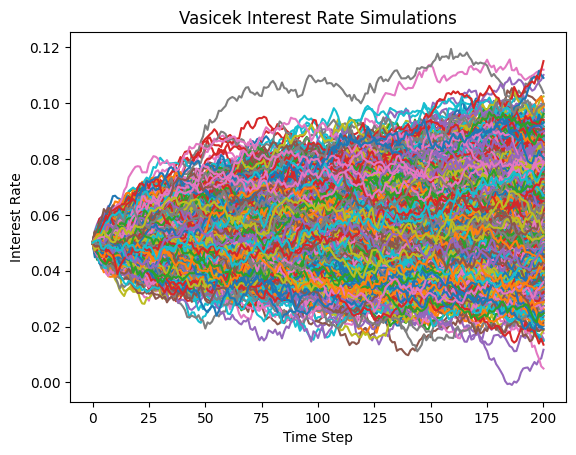

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- シミュレーション設定 ---
N_simulations = 1000     # 金利パス数
N_points = 200           # 金利パスの点数


def vasicek_monte_carlo(X, r0, kappa, theta, sigma, T=1.0):
    """
    X     : 債券の額面
    r0    : 初期金利
    kappa : 平均回帰速度
    theta : 長期平均
    sigma : ボラティリティ
    T     : 満期（年）
    """
    dt = T / float(N_points)
    results = []

    # --- 金利パスを多数生成 ---
    for _ in range(N_simulations):
        rates = [r0]

        for _ in range(N_points):
            dr = kappa * (theta - rates[-1]) * dt \
                 + sigma * np.sqrt(dt) * np.random.normal()
            rates.append(rates[-1] + dr)

        results.append(rates)

    return np.array(results)  # shape: (N_sim, N_points+1)


if __name__ == "__main__":
    # パラメータ例
    X = 1000
    r0 = 0.05
    kappa = 0.3
    theta = 0.09
    sigma = 0.02
    T = 1.0

    # --- 金利シミュレーション ---
    rates = vasicek_monte_carlo(X, r0, kappa, theta, sigma, T)

    # DataFrame に変換（任意）
    df = pd.DataFrame(rates)
    print(df.head())

    # --- 債券価格の計算 ---
    dt = T / float(N_points)

    # 積分（リーマン和）
    integral_sum = rates.sum(axis=1) * dt

    # 割引因子の計算
    discount_factors = np.exp(-integral_sum)

    # 平均を取る（Monte Carlo）
    bond_price = X * np.mean(discount_factors)

    print(f"Bond Price (Monte Carlo): ${bond_price:,.2f}")

    # --- プロット ---
    df.T.plot(legend=False)
    plt.title("Vasicek Interest Rate Simulations")
    plt.xlabel("Time Step")
    plt.ylabel("Interest Rate")
    plt.show()

## 5. 計算結果の例（Monte Carlo）

Monte Carlo シミュレーションの結果から、短金利モデルと債券価格の関係が直感的に確認できる。

- 初期金利が高い  
  → 割引が強くなる  
  → **債券価格は低下する**

- 初期金利が低い  
  → 割引が弱くなる  
  → **債券価格は上昇する**

以下は、Vasicek モデルのパラメータを変更したときの  
ゼロクーポン債価格（シミュレーション例）である：

| 初期金利 \(r_0\) | 長期平均 \(\theta\) | Bond Price |
|------------------|---------------------|------------|
| 0.10             | 0.09                | 約 \$570   |
| 0.01             | 0.03                | 約 \$880   |

この結果から、短金利の水準が債券価格に直接的な影響を与えることが分かる。

## 6. 計算結果の解釈

Monte Carlo シミュレーションの結果から、次のような性質が確認できる：

- 初期金利が高い  
  → 割引が強くなり、**債券価格は低下**する  

- 長期平均金利が高い  
  → 将来の金利水準が高くなり、**債券価格は低下**する  

このように、短金利モデルのパラメータは債券価格に直接影響を与える。

---

## 7. まとめ

- Vasicek モデルは **OU 過程ベースの短金利モデル**である  
- Monte Carlo 法により、割引因子の期待値を直接数値評価できる  
- 本手法は **CIR モデルや Hull–White モデル**など、他の金利モデルにも容易に拡張可能である  
